<a href="https://colab.research.google.com/github/joalissoncm/cancerparaiba/blob/main/analise_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

Taxas de mortalidade pelas topografias selecionadas*, brutas e ajustadas por idade, pelas populações mundial e brasileira de 2010, por 100.000 homens e mulheres, na região Nordeste, entre 2015 e 2019.

In [ ]:
#Importando os dados que tirei do Instituto Nacional de Câncer(INCA).
dados = pd.read_csv("https://raw.githubusercontent.com/joalissoncm/cancerparaiba/main/dataset/cancer_stats%20-%20Modelo05_20220311082945.csv")

In [ ]:
#Conferindo se os dados não tem dados nulos.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LOCALIDADE       10 non-null     object
 1   TAXA1            10 non-null     object
 2   TAXA2            10 non-null     object
 3   TAXA3            10 non-null     object
 4   TAXA4            10 non-null     object
 5   TAXA5            10 non-null     object
 6   TAXA6            10 non-null     object
 7   TAXA7            10 non-null     object
 8   TAXA8            10 non-null     object
 9   TAXA9            10 non-null     object
 10  TAXA10           10 non-null     object
 11  TAXA11           10 non-null     object
 12  Idade ignorada   10 non-null     object
 13  TAXA BRUTA       10 non-null     object
 14  Classificação    9 non-null      object
 15  Pop. Mundial(1)  10 non-null     object
 16  Pop. Brasil(2)   10 non-null     object
dtypes: object(17)
memory usage: 1.5+ KB


In [ ]:
#Conferindo o formato da base de dados. O que é útil quando se trabalha com imensas quantidades de dados.
dados.shape

(10, 17)

In [ ]:
#Verificando se não tem valores duplicados
print("Duplicated values: ", dados.duplicated().sum())

Duplicated values:  0


In [ ]:
#Finalmente observando as informações
dados.head(10)

,LOCALIDADE,TAXA1,TAXA2,TAXA3,TAXA4,TAXA5,TAXA6,TAXA7,TAXA8,TAXA9,TAXA10,TAXA11,Idade ignorada,TAXA BRUTA,Classificação,Pop. Mundial(1),Pop. Brasil(2)
0,-,00 a 04,05 a 09,10 a 14,15 a 19,20 a 29,30 a 39,40 a 49,50 a 59,60 a 69,70 a 79,80 ou mais,Idade ignorada,Taxa Bruta,Classificação,Pop. Mundial(1),Pop. Brasil(2)
1,Alagoas,0,0,"0,06","0,25","1,66","6,6","22,11","51,52","106,71","214,23","427,25",0,"24,68",8,"26,54","29,21"
2,Bahia,"0,03","0,02","0,06","0,2","1,01","6,34","19,85","47,91","111,81","219,58","476,45",0,"29,24",7,"26,82","29,65"
3,Ceará,"0,03",0,"0,05","0,17","1,23","7,45","22,49","62,02","141,77","295,95","605,43",0,"36,99",1,"34,25","37,85"
4,Maranhão,"0,03","0,03","0,19","0,18","1,32","8,25","22,15","49,59","111,7","235,01","422,85",0,"23,57",4,"27,46","30,15"
5,Paraíba,"0,06",0,0,"0,43","1,34","6,55","20,58","50,01","118,84","238,67","532,27",0,"33,41",2,"28,82","31,96"
6,Pernambuco,0,"0,03","0,02","0,25","1,46","7,85","23,68","60,59","135,55","277,03","588,48",0,"35,78",5,"33,18","36,72"
7,Piauí,0,0,0,"0,28","1,63","8,51","21,71","51,17","130,12","268,96","613,7",0,"32,79",3,"31,83","35,48"
8,Rio Grande do Norte,"0,15",0,0,"0,34","1,31","6,74","20,92","59,53","132,87","276,6","566,34",0,"35,78",6,"32,17","35,53"
9,Sergipe,0,0,0,"0,19","1,31","9,75","23,09","63,72","129,02","270,36","586,55",0,"31,1",NaN,"32,91","36,57"


## **Explorando os dados**
Partindo para a análise estatística e exploratória

#### Números de casos de câncers entre pessoas de 0 a 4 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA1.max().sort_values(ascending=False)[:12]

LOCALIDADE
-                      00 a 04
Rio Grande do Norte       0,15
Paraíba                   0,06
Bahia                     0,03
Ceará                     0,03
Maranhão                  0,03
Alagoas                      0
Pernambuco                   0
Piauí                        0
Sergipe                      0
Name: TAXA1, dtype: object

#### Números de casos de câncers entre pessoas de 5 a 9 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA2.max().sort_values(ascending=False)[:12]

LOCALIDADE
-                      05 a 09
Maranhão                  0,03
Pernambuco                0,03
Bahia                     0,02
Alagoas                      0
Ceará                        0
Paraíba                      0
Piauí                        0
Rio Grande do Norte          0
Sergipe                      0
Name: TAXA2, dtype: object

#### Números de casos de câncers entre pessoas de 10 a 14 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA3.max().sort_values(ascending=False)[:12]

LOCALIDADE
-                      10 a 14
Maranhão                  0,19
Alagoas                   0,06
Bahia                     0,06
Ceará                     0,05
Pernambuco                0,02
Paraíba                      0
Piauí                        0
Rio Grande do Norte          0
Sergipe                      0
Name: TAXA3, dtype: object

#### Números de casos de câncers entre pessoas de 15 a 19 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA4.max().sort_values(ascending=False)[:12]

LOCALIDADE
-                      15 a 19
Paraíba                   0,43
Rio Grande do Norte       0,34
Piauí                     0,28
Alagoas                   0,25
Pernambuco                0,25
Bahia                      0,2
Sergipe                   0,19
Maranhão                  0,18
Ceará                     0,17
Name: TAXA4, dtype: object

#### Números de casos de câncers entre pessoas de 20 a 29 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA5.max().sort_values(ascending=False)[:12]

LOCALIDADE
-                      20 a 29
Alagoas                   1,66
Piauí                     1,63
Pernambuco                1,46
Paraíba                   1,34
Maranhão                  1,32
Rio Grande do Norte       1,31
Sergipe                   1,31
Ceará                     1,23
Bahia                     1,01
Name: TAXA5, dtype: object

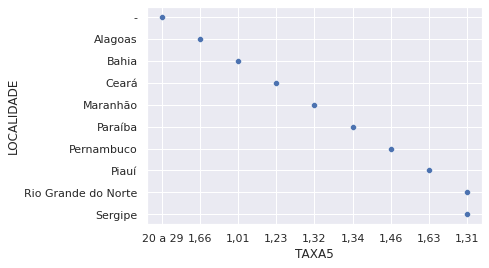

In [ ]:
#Gráfico da TAXA5 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA5', y = 'LOCALIDADE')

#### Números de casos de câncers entre pessoas de 30 a 39 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA6.max().sort_values(ascending=False)[:12]

LOCALIDADE
Sergipe                   9,75
Piauí                     8,51
Maranhão                  8,25
Pernambuco                7,85
Ceará                     7,45
Rio Grande do Norte       6,74
Alagoas                    6,6
Paraíba                   6,55
Bahia                     6,34
-                      30 a 39
Name: TAXA6, dtype: object

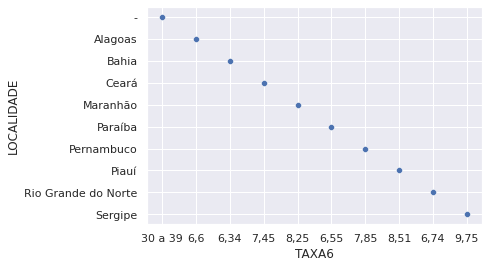

In [ ]:
#Gráfico da TAXA6 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA6', y = 'LOCALIDADE')

#### Números de casos de câncers entre pessoas de 40 a 49 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA7.max().sort_values(ascending=False)[:12]

LOCALIDADE
-                      40 a 49
Pernambuco               23,68
Sergipe                  23,09
Ceará                    22,49
Maranhão                 22,15
Alagoas                  22,11
Piauí                    21,71
Rio Grande do Norte      20,92
Paraíba                  20,58
Bahia                    19,85
Name: TAXA7, dtype: object

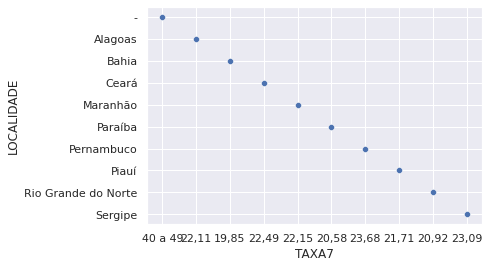

In [ ]:
#Gráfico da TAXA7 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA7', y = 'LOCALIDADE')

#### Números de casos de câncers entre pessoas de 50 a 59 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA8.max().sort_values(ascending=False)[:10]

LOCALIDADE
Sergipe                  63,72
Ceará                    62,02
Pernambuco               60,59
Rio Grande do Norte      59,53
Alagoas                  51,52
Piauí                    51,17
Paraíba                  50,01
-                      50 a 59
Maranhão                 49,59
Bahia                    47,91
Name: TAXA8, dtype: object

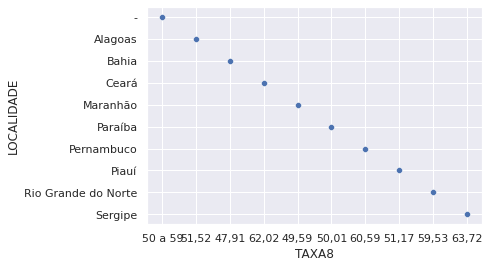

In [ ]:
#Gráfico da TAXA8 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA8', y = 'LOCALIDADE')

#### Números de casos de câncers entre pessoas de 60 a 69 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA9.max().sort_values(ascending=False)[:10]

LOCALIDADE
-                      60 a 69
Ceará                   141,77
Pernambuco              135,55
Rio Grande do Norte     132,87
Piauí                   130,12
Sergipe                 129,02
Paraíba                 118,84
Bahia                   111,81
Maranhão                 111,7
Alagoas                 106,71
Name: TAXA9, dtype: object

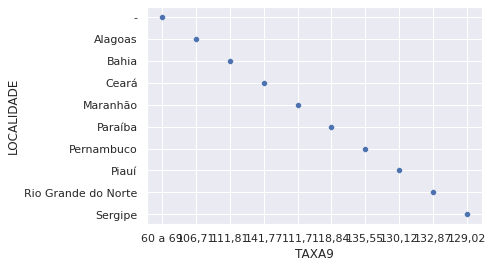

In [ ]:
#Gráfico da TAXA9 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA9', y = 'LOCALIDADE')

#### Números de casos de câncers entre pessoas de 70 a 79 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA10.max().sort_values(ascending=False)[:10]

LOCALIDADE
-                      70 a 79
Ceará                   295,95
Pernambuco              277,03
Rio Grande do Norte      276,6
Sergipe                 270,36
Piauí                   268,96
Paraíba                 238,67
Maranhão                235,01
Bahia                   219,58
Alagoas                 214,23
Name: TAXA10, dtype: object

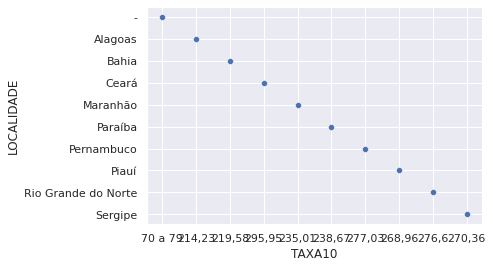

In [ ]:
#Gráfico da TAXA10 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA10', y = 'LOCALIDADE')

#### Números de casos de câncers entre pessoas de 80 ou mais anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA11.max().sort_values(ascending=False)[:10]

LOCALIDADE
-                      80 ou mais
Piauí                       613,7
Ceará                      605,43
Pernambuco                 588,48
Sergipe                    586,55
Rio Grande do Norte        566,34
Paraíba                    532,27
Bahia                      476,45
Alagoas                    427,25
Maranhão                   422,85
Name: TAXA11, dtype: object

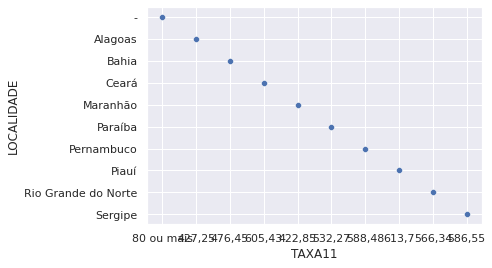

In [ ]:
#Gráfico da TAXA11 dividido por estados.
sns.scatterplot(data=dados, x= 'TAXA11', y = 'LOCALIDADE')

In [ ]:
#Consultando todos os dados pelo Estado
dados[dados['LOCALIDADE']  == 'Paraíba']

,LOCALIDADE,TAXA1,TAXA2,TAXA3,TAXA4,TAXA5,TAXA6,TAXA7,TAXA8,TAXA9,TAXA10,TAXA11,Idade ignorada,TAXA BRUTA,Classificação,Pop. Mundial(1),Pop. Brasil(2)
5,Paraíba,"0,06",0,0,"0,43","1,34","6,55","20,58","50,01","118,84","238,67","532,27",0,"33,41",2,"28,82","31,96"


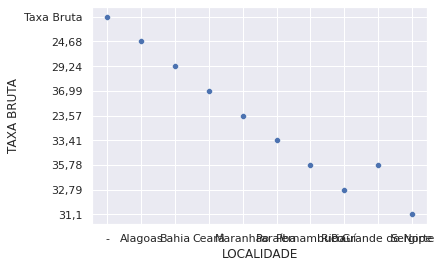

In [ ]:
# Gráfico da taxa bruta de acordo com o estado
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA BRUTA')